In [1]:
import numpy as np
import matplotlib as mpl; mpl.use('agg')
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation
%matplotlib inline

## Gap 1: the Differential Equation

In [2]:
def y_prime(t, y, A):
    # y_dot = A(mu) * y
    return A @ y

## Plotting the Phase Portrait

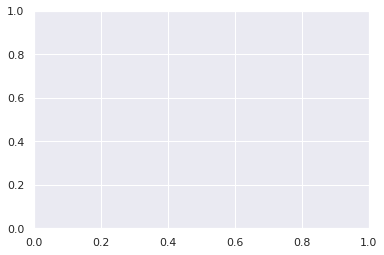

In [3]:
# Plot phase portrait
fig, ax = plt.subplots()

## Gaps 2, 3, 4, 5

In [4]:
def plot_phase_portrait(mu):
    print('Solving with mu =', mu)

    # Clear Screen
    ax.clear()

    # Define A(mu)
    A = np.array([[-mu, -1],
                  [  9, -2]])

    solution = solve_ivp(
        y_prime,
        t_span=(0, 50),
        y0=[1, 1],
        t_eval=np.arange(0, 50, 0.025),
        args=(A,),
    )
    t, y = solution.t, solution.y

    # GAP 4: Compute bounds for meshgrid
    y0min, y1min = np.min(y, axis=1)
    y0max, y1max = np.max(y, axis=1)

    # GAP 5: Compute Force Field
    X, Y = np.meshgrid(
        np.linspace(y0min, y0max, num=24),
        np.linspace(y1min, y1max, num=24),
    )
    XY = np.array([X, Y]).reshape(2, -1).T
    U, V = np.array([A @ xy for xy in XY]).T

    # Normalize Force Field
    mag = np.linalg.norm([U, V], axis=0)
    U, V = U / mag, V / mag

    sns.lineplot(y[0, :], y[1, :], sort=False, ax=ax, color='red')
    plt.quiver(X, Y, U, V, mag, cmap='gnuplot2')
    plt.gca().set_xlabel('y[0]')
    plt.gca().set_ylabel('y[1]')
    plt.title('Phase Portrait at mu = {:.4f}'.format(mu))
    plt.tight_layout()

## GAP 6: Create Animation

Solving with mu = -4.0
Solving with mu = -4.0
Solving with mu = -3.99
Solving with mu = -3.98
Solving with mu = -3.97
Solving with mu = -3.96
Solving with mu = -3.95
Solving with mu = -3.94
Solving with mu = -3.93
Solving with mu = -3.92
Solving with mu = -3.91
Solving with mu = -3.9
Solving with mu = -3.89
Solving with mu = -3.88
Solving with mu = -3.87
Solving with mu = -3.86
Solving with mu = -3.85
Solving with mu = -3.84
Solving with mu = -3.83
Solving with mu = -3.82
Solving with mu = -3.81
Solving with mu = -3.8
Solving with mu = -3.79
Solving with mu = -3.78
Solving with mu = -3.77
Solving with mu = -3.76
Solving with mu = -3.75
Solving with mu = -3.74
Solving with mu = -3.73
Solving with mu = -3.7199999999999998
Solving with mu = -3.71
Solving with mu = -3.7
Solving with mu = -3.69
Solving with mu = -3.68
Solving with mu = -3.67
Solving with mu = -3.66
Solving with mu = -3.65
Solving with mu = -3.64
Solving with mu = -3.63
Solving with mu = -3.62
Solving with mu = -3.61
Solving

Solving with mu = -1.0299999999999998
Solving with mu = -1.02
Solving with mu = -1.0099999999999998
Solving with mu = -1.0
Solving with mu = -0.9899999999999998
Solving with mu = -0.98
Solving with mu = -0.9699999999999998
Solving with mu = -0.96
Solving with mu = -0.9499999999999997
Solving with mu = -0.94
Solving with mu = -0.9299999999999997
Solving with mu = -0.9199999999999999
Solving with mu = -0.9100000000000001
Solving with mu = -0.8999999999999999
Solving with mu = -0.8900000000000001
Solving with mu = -0.8799999999999999
Solving with mu = -0.8700000000000001
Solving with mu = -0.8599999999999999
Solving with mu = -0.8500000000000001
Solving with mu = -0.8399999999999999
Solving with mu = -0.8300000000000001
Solving with mu = -0.8199999999999998
Solving with mu = -0.81
Solving with mu = -0.7999999999999998
Solving with mu = -0.79
Solving with mu = -0.7799999999999998
Solving with mu = -0.77
Solving with mu = -0.7599999999999998
Solving with mu = -0.75
Solving with mu = -0.7399

Solving with mu = 1.2800000000000002
Solving with mu = 1.29
Solving with mu = 1.2999999999999998
Solving with mu = 1.3100000000000005
Solving with mu = 1.3200000000000003
Solving with mu = 1.33
Solving with mu = 1.3399999999999999
Solving with mu = 1.3500000000000005
Solving with mu = 1.3600000000000003
Solving with mu = 1.37
Solving with mu = 1.38
Solving with mu = 1.3899999999999997
Solving with mu = 1.4000000000000004
Solving with mu = 1.4100000000000001
Solving with mu = 1.42
Solving with mu = 1.4299999999999997
Solving with mu = 1.4400000000000004
Solving with mu = 1.4500000000000002
Solving with mu = 1.46
Solving with mu = 1.4699999999999998
Solving with mu = 1.4800000000000004
Solving with mu = 1.4900000000000002
Solving with mu = 1.5
Solving with mu = 1.5099999999999998
Solving with mu = 1.5200000000000005
Solving with mu = 1.5300000000000002
Solving with mu = 1.54
Solving with mu = 1.5499999999999998
Solving with mu = 1.5600000000000005
Solving with mu = 1.5700000000000003
Sol

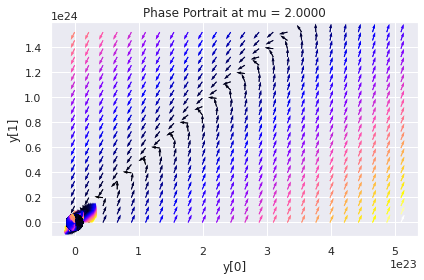

In [5]:
anim = FuncAnimation(
    fig,
    plot_phase_portrait,
    frames=np.linspace(-4, 2, num=601), # values of the parameter `mu`
    interval=333, # 333 ms ~ 3 FPS
)
anim.save('phase_portrait.mp4') # write animation to video file